In [151]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import warnings
import pandas as pd
import numpy as np
import requests
import time
import random


warnings.simplefilter(action='ignore', category=FutureWarning)

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Generate Cities List

In [152]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

638

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [153]:
columns = ['City','Cloudiness','Country','Date',
        'Humidity','Lat','Lng','Max Temp','Wind Speed']
cityDf = pd.DataFrame(columns=columns)


In [154]:
#base url used to access api
baseUrl = "http://api.openweathermap.org/data/2.5/weather?q="

#get random selection of unique values in cities list
cities = set(cities)
ranCities = random.sample(cities, len(cities))

#get data for each city in cities list using api call
count = 1
print ("Begin Data Retieval\n------------------")

for city in ranCities:
    targetUrl = (baseUrl + city + "&units=imperial" + "&appid=" + api_key)
    resp = requests.get(targetUrl).json()
     #if code is 404 skip
    if resp['cod'] == '404':
        print('Could not find city: ' + city.capitalize() + '. Skipping...')
     #if city cannot be found just ignore continue loop
    try:    
        print ("Processing Record " + str(count) + " | " + resp["name"] + 
          '\n' + targetUrl)
    except KeyError:
        continue
    
    
    #add data to a data frame
    cityDf.set_value(count, "City", resp["name"])
    cityDf.set_value(count,"Cloudiness", resp["clouds"]["all"])
    cityDf.set_value(count,"Country", resp["sys"]["country"])
    cityDf.set_value(count,"Date", resp["dt"])
    cityDf.set_value(count,"Humidity", resp["main"]["humidity"])
    cityDf.set_value(count,"Lat", resp["coord"]["lat"])
    cityDf.set_value(count,"Lng", resp["coord"]["lon"])
    cityDf.set_value(count,"Max Temp", resp["main"]["temp_max"])
    cityDf.set_value(count,"Wind Speed", resp["wind"]["speed"])
  
    count += 1
   

Begin Data Retieval
------------------
Processing Record 1 | Pokhara
http://api.openweathermap.org/data/2.5/weather?q=pokhara&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 2 | Talcahuano
http://api.openweathermap.org/data/2.5/weather?q=talcahuano&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 3 | Yarega
http://api.openweathermap.org/data/2.5/weather?q=yarega&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 4 | Ulladulla
http://api.openweathermap.org/data/2.5/weather?q=ulladulla&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Could not find city: Louisbourg. Skipping...
Processing Record 5 | Polyarnyy
http://api.openweathermap.org/data/2.5/weather?q=polyarnyy&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 6 | Tottori
http://api.openweathermap.org/data/2.5/weather?q=tottori&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 7 | Burgeo
http://api.openweathermap.org

Processing Record 56 | Santa Isabel do Rio Negro
http://api.openweathermap.org/data/2.5/weather?q=santa isabel do rio negro&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 57 | Isangel
http://api.openweathermap.org/data/2.5/weather?q=isangel&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 58 | San Patricio
http://api.openweathermap.org/data/2.5/weather?q=san patricio&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 59 | Ilorin
http://api.openweathermap.org/data/2.5/weather?q=ilorin&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 60 | Leh
http://api.openweathermap.org/data/2.5/weather?q=leh&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 61 | Aluksne
http://api.openweathermap.org/data/2.5/weather?q=aluksne&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 62 | Bay Roberts
http://api.openweathermap.org/data/2.5/weather?q=bay roberts&units=imperial&a

Processing Record 112 | Filadelfia
http://api.openweathermap.org/data/2.5/weather?q=filadelfia&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 113 | Oristano
http://api.openweathermap.org/data/2.5/weather?q=oristano&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 114 | Ati
http://api.openweathermap.org/data/2.5/weather?q=ati&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 115 | Dubbo
http://api.openweathermap.org/data/2.5/weather?q=dubbo&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 116 | Whitehorse
http://api.openweathermap.org/data/2.5/weather?q=whitehorse&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 117 | Praia da Vitoria
http://api.openweathermap.org/data/2.5/weather?q=praia da vitoria&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 118 | Shetpe
http://api.openweathermap.org/data/2.5/weather?q=shetpe&units=imperial&appid=c1335d6c3b7fc1

Processing Record 167 | Gisors
http://api.openweathermap.org/data/2.5/weather?q=gisors&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 168 | Zemio
http://api.openweathermap.org/data/2.5/weather?q=zemio&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 169 | Ilanskiy
http://api.openweathermap.org/data/2.5/weather?q=ilanskiy&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 170 | Ushuaia
http://api.openweathermap.org/data/2.5/weather?q=ushuaia&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 171 | Andros Town
http://api.openweathermap.org/data/2.5/weather?q=andros town&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 172 | Uva
http://api.openweathermap.org/data/2.5/weather?q=uva&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Could not find city: Sentyabrskiy. Skipping...
Could not find city: Sataua. Skipping...
Processing Record 173 | Khandyga
http://api.openweathermap

Processing Record 224 | Dzilam Gonzalez
http://api.openweathermap.org/data/2.5/weather?q=dzilam gonzalez&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 225 | Jinan
http://api.openweathermap.org/data/2.5/weather?q=jinan&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 226 | Tautira
http://api.openweathermap.org/data/2.5/weather?q=tautira&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 227 | Bilibino
http://api.openweathermap.org/data/2.5/weather?q=bilibino&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 228 | Kaeo
http://api.openweathermap.org/data/2.5/weather?q=kaeo&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 229 | Qandala
http://api.openweathermap.org/data/2.5/weather?q=qandala&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 230 | Ixtapa
http://api.openweathermap.org/data/2.5/weather?q=ixtapa&units=imperial&appid=c1335d6c3b7fc18480ca979f83

Processing Record 280 | Hafizabad
http://api.openweathermap.org/data/2.5/weather?q=hafizabad&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Could not find city: Zhaocheng. Skipping...
Processing Record 281 | Teseney
http://api.openweathermap.org/data/2.5/weather?q=teseney&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Could not find city: Camana. Skipping...
Processing Record 282 | Klaksvik
http://api.openweathermap.org/data/2.5/weather?q=klaksvik&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 283 | Port Elizabeth
http://api.openweathermap.org/data/2.5/weather?q=port elizabeth&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 284 | Port-Gentil
http://api.openweathermap.org/data/2.5/weather?q=port-gentil&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 285 | Puerto Colombia
http://api.openweathermap.org/data/2.5/weather?q=puerto colombia&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Could not fin

Processing Record 334 | Mataura
http://api.openweathermap.org/data/2.5/weather?q=mataura&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 335 | Vila Velha
http://api.openweathermap.org/data/2.5/weather?q=vila velha&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 336 | Saint-Leu
http://api.openweathermap.org/data/2.5/weather?q=saint-leu&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Could not find city: Samusu. Skipping...
Processing Record 337 | Sosnovo-Ozerskoye
http://api.openweathermap.org/data/2.5/weather?q=sosnovo-ozerskoye&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 338 | Sawai Madhopur
http://api.openweathermap.org/data/2.5/weather?q=sawai madhopur&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 339 | Belmonte
http://api.openweathermap.org/data/2.5/weather?q=belmonte&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 340 | Yellowknife
http://api.openweat

Processing Record 389 | Yinchuan
http://api.openweathermap.org/data/2.5/weather?q=yinchuan&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 390 | Fairbanks
http://api.openweathermap.org/data/2.5/weather?q=fairbanks&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 391 | Bhadrachalam
http://api.openweathermap.org/data/2.5/weather?q=bhadrachalam&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 392 | Khash
http://api.openweathermap.org/data/2.5/weather?q=khash&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 393 | East London
http://api.openweathermap.org/data/2.5/weather?q=east london&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 394 | Tromso
http://api.openweathermap.org/data/2.5/weather?q=tromso&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 395 | Cap-aux-Meules
http://api.openweathermap.org/data/2.5/weather?q=cap-aux-meules&units=imperial&appid=

Processing Record 442 | Coihaique
http://api.openweathermap.org/data/2.5/weather?q=coihaique&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 443 | Kalmunai
http://api.openweathermap.org/data/2.5/weather?q=kalmunai&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 444 | Itarema
http://api.openweathermap.org/data/2.5/weather?q=itarema&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 445 | Moron
http://api.openweathermap.org/data/2.5/weather?q=moron&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 446 | Kahului
http://api.openweathermap.org/data/2.5/weather?q=kahului&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 447 | Tokur
http://api.openweathermap.org/data/2.5/weather?q=tokur&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 448 | Bredasdorp
http://api.openweathermap.org/data/2.5/weather?q=bredasdorp&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc

Processing Record 499 | Arraial do Cabo
http://api.openweathermap.org/data/2.5/weather?q=arraial do cabo&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 500 | Madimba
http://api.openweathermap.org/data/2.5/weather?q=madimba&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 501 | Fortuna
http://api.openweathermap.org/data/2.5/weather?q=fortuna&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 502 | Namibe
http://api.openweathermap.org/data/2.5/weather?q=namibe&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 503 | Borovo
http://api.openweathermap.org/data/2.5/weather?q=borovo&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 504 | Kaduqli
http://api.openweathermap.org/data/2.5/weather?q=kaduqli&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 505 | Aykhal
http://api.openweathermap.org/data/2.5/weather?q=aykhal&units=imperial&appid=c1335d6c3b7fc18480ca97

Processing Record 554 | Dubreka
http://api.openweathermap.org/data/2.5/weather?q=dubreka&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 555 | Thompson
http://api.openweathermap.org/data/2.5/weather?q=thompson&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 556 | Barrow
http://api.openweathermap.org/data/2.5/weather?q=barrow&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 557 | Hermanus
http://api.openweathermap.org/data/2.5/weather?q=hermanus&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 558 | Coquimbo
http://api.openweathermap.org/data/2.5/weather?q=coquimbo&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 559 | Margate
http://api.openweathermap.org/data/2.5/weather?q=margate&units=imperial&appid=c1335d6c3b7fc18480ca979f83fc5986
Processing Record 560 | Port Hardy
http://api.openweathermap.org/data/2.5/weather?q=port hardy&units=imperial&appid=c1335d6c3b7fc18480ca97

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [155]:
cityDf.count()

City          575
Cloudiness    575
Country       575
Date          575
Humidity      575
Lat           575
Lng           575
Max Temp      575
Wind Speed    575
dtype: int64

In [156]:
cityDf.to_csv("CitiesDataFrame.csv")

In [157]:
cityDf.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,Pokhara,0,NP,1547266866,69,28.21,83.99,40.84,2.15
2,Talcahuano,0,CL,1547265600,87,-36.72,-73.12,53.6,3.36
3,Yarega,88,RU,1547267133,73,63.43,53.58,15.41,10.98
4,Ulladulla,0,AU,1547267133,69,-35.36,150.48,81.07,2.93
5,Polyarnyy,75,RU,1547265600,85,69.2,33.45,23,2.24


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

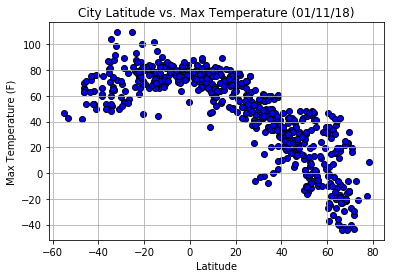

In [158]:
plt.scatter(cityDf["Lat"], cityDf["Max Temp"], marker="o", 
            edgecolors="black", color="blue")

plt.title('City Latitude vs. Max Temperature (01/11/18)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.savefig("CityLatvsTemp.png")

#### Latitude vs. Humidity Plot

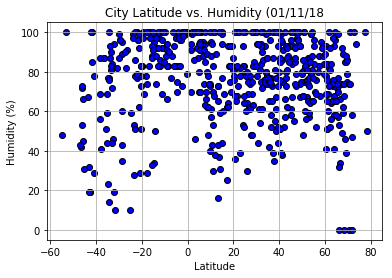

In [159]:
plt.scatter(cityDf["Lat"], cityDf["Humidity"], marker="o", 
            edgecolors="black", color="blue")

plt.title('City Latitude vs. Humidity (01/11/18')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig("CityLatvsHumidity.png")

#### Latitude vs. Cloudiness Plot

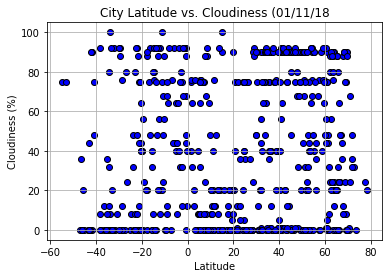

In [160]:
plt.scatter(cityDf["Lat"], cityDf["Cloudiness"], marker="o", 
            edgecolors="black", color="blue")

plt.title('City Latitude vs. Cloudiness (01/11/18')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig("CityLatvsCloudiness.png")

#### Latitude vs. Wind Speed Plot

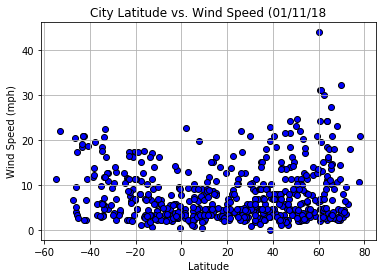

In [161]:
plt.scatter(cityDf["Lat"], cityDf["Wind Speed"], marker="o", 
            edgecolors="black", color="blue")

plt.title('City Latitude vs. Wind Speed (01/11/18')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig("CityLatvsWindSpd.png")